In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [80]:
df=pd.read_csv("C://Users//smpop//OneDrive//Pulpit//Rrrrr//archive//Car_Insurance_Claim.csv")

In [81]:
df=df.drop(['ID','POSTAL_CODE','RACE'],axis=1)
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  8149 non-null   object 
 1   GENDER               8149 non-null   object 
 2   DRIVING_EXPERIENCE   8149 non-null   object 
 3   EDUCATION            8149 non-null   object 
 4   INCOME               8149 non-null   object 
 5   CREDIT_SCORE         8149 non-null   float64
 6   VEHICLE_OWNERSHIP    8149 non-null   float64
 7   VEHICLE_YEAR         8149 non-null   object 
 8   MARRIED              8149 non-null   float64
 9   CHILDREN             8149 non-null   float64
 10  ANNUAL_MILEAGE       8149 non-null   float64
 11  VEHICLE_TYPE         8149 non-null   object 
 12  SPEEDING_VIOLATIONS  8149 non-null   int64  
 13  DUIS                 8149 non-null   int64  
 14  PAST_ACCIDENTS       8149 non-null   int64  
 15  OUTCOME              8149 non-null   float6

#We will decide to one-hot encode every possible variable, even though it isn't helpfull for every ML algorithm.

In [82]:
#ENCODING >2 categorical variables (dropping first met column so we do not meet collinearity)
for colnames in ['AGE','DRIVING_EXPERIENCE','INCOME','EDUCATION']:
    dummies = pd.get_dummies(df[colnames]).astype('int')
    dummies.columns = [f"{colnames}:"+i for i in dummies.columns]
    df=df.drop([colnames],axis=1)
    df=pd.concat([df,dummies],axis=1)


In [83]:
#1/0-ing vehicle_info and gender
df['GENDER'] = df['GENDER'].replace({'female':1, 'male':0})
df['VEHICLE_YEAR'] = df['VEHICLE_YEAR'].replace({'before 2015':0, 'after 2015':1})
df['VEHICLE_TYPE'] = df['VEHICLE_TYPE'].replace({'sedan':0, 'sports car':1})


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     8149 non-null   int64  
 1   CREDIT_SCORE               8149 non-null   float64
 2   VEHICLE_OWNERSHIP          8149 non-null   float64
 3   VEHICLE_YEAR               8149 non-null   int64  
 4   MARRIED                    8149 non-null   float64
 5   CHILDREN                   8149 non-null   float64
 6   ANNUAL_MILEAGE             8149 non-null   float64
 7   VEHICLE_TYPE               8149 non-null   int64  
 8   SPEEDING_VIOLATIONS        8149 non-null   int64  
 9   DUIS                       8149 non-null   int64  
 10  PAST_ACCIDENTS             8149 non-null   int64  
 11  OUTCOME                    8149 non-null   float64
 12  AGE:16-25                  8149 non-null   int32  
 13  AGE:26-39                  8149 non-null   int32  
 1

In [84]:
#to omit multicollinearity we will drop 1 col from ['AGE','DRIVING_EXPERIENCE','INCOME','EDUCATION'] cols.
df=df.drop(['DRIVING_EXPERIENCE:0-9y','INCOME:poverty','EDUCATION:none','AGE:16-25'],axis=1)

Our data is ready to be used for modeling purposes :)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     8149 non-null   int64  
 1   CREDIT_SCORE               8149 non-null   float64
 2   VEHICLE_OWNERSHIP          8149 non-null   float64
 3   VEHICLE_YEAR               8149 non-null   int64  
 4   MARRIED                    8149 non-null   float64
 5   CHILDREN                   8149 non-null   float64
 6   ANNUAL_MILEAGE             8149 non-null   float64
 7   VEHICLE_TYPE               8149 non-null   int64  
 8   SPEEDING_VIOLATIONS        8149 non-null   int64  
 9   DUIS                       8149 non-null   int64  
 10  PAST_ACCIDENTS             8149 non-null   int64  
 11  OUTCOME                    8149 non-null   float64
 12  AGE:26-39                  8149 non-null   int32  
 13  AGE:40-64                  8149 non-null   int32  
 1

In [86]:
y=df['OUTCOME']
X=df.drop(['OUTCOME'],axis=1)

In [87]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=50,stratify=y)

# Simple logistic regression

Logistic regression is a statistical method used to model (in the simpliest example) a binary dependent variable (e.g., 0/1, yes/no). Unlike linear regression, which predicts continuous values, logistic regression models the log-odds of an event occurring. By applying the logistic (sigmoid) function, the outputs are transformed into values between 0 and 1, which can be interpreted as probabilities. This allows the model to estimate the likelihood of an outcome based on the input variables.

In [91]:
#Simple Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

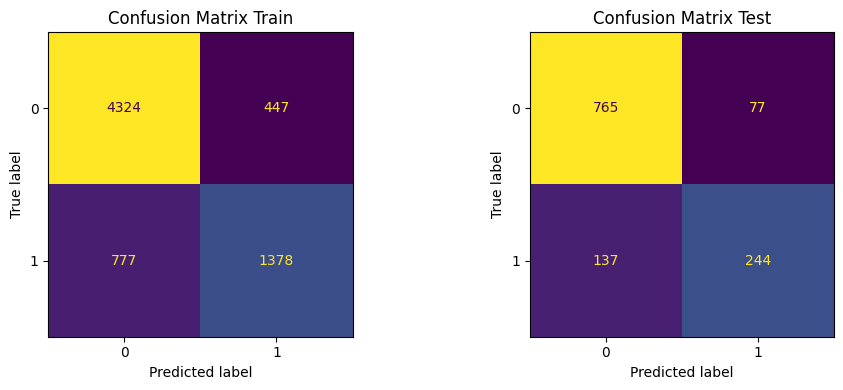

Test-data classification report
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       842
         1.0       0.76      0.64      0.70       381

    accuracy                           0.83      1223
   macro avg       0.80      0.77      0.79      1223
weighted avg       0.82      0.83      0.82      1223



In [92]:
predictions_train = log_reg.predict(X_train)
predictions_test = log_reg.predict(X_test)

    # Macierze pomyłek
cm1 = confusion_matrix(y_train, predictions_train)
cm2 = confusion_matrix(y_test, predictions_test)

    # Rysowanie obok siebie
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Train
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(ax=axes[0], colorbar=False)
axes[0].set_title("Confusion Matrix Train")

    # Test
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(ax=axes[1], colorbar=False)
axes[1].set_title("Confusion Matrix Test")

plt.tight_layout()
plt.show()

    # Raport klasyfikacji dla testu
print("Test-data classification report")
print(classification_report(y_test, predictions_test))

In [67]:
#func for next ML-models
def print_results(grid_):
    predictions_train = grid_.best_estimator_.predict(X_train)
    predictions_test = grid_.best_estimator_.predict(X_test)

    # Macierze pomyłek
    cm1 = confusion_matrix(y_train, predictions_train)
    cm2 = confusion_matrix(y_test, predictions_test)

    # Rysowanie obok siebie
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Train
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
    disp1.plot(ax=axes[0], colorbar=False)
    axes[0].set_title("Confusion Matrix Train")

    # Test
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
    disp2.plot(ax=axes[1], colorbar=False)
    axes[1].set_title("Confusion Matrix Test")

    plt.tight_layout()
    plt.show()

    # Raport klasyfikacji dla testu
    print("Test-data classification report")
    print(classification_report(y_test, predictions_test))

# SVM

Support Vector Machine (SVM) is a machine learning method that, in the simplest case of binary classification, aims to find a hyperplane that best separates the two classes. Its objective is not only to separate the data but also to maximize the margin, i.e., the distance between the hyperplane and the closest data points (the support vectors). The loss function used in SVM is based on hinge loss, which penalizes misclassifications while encouraging a larger margin, leading to a more robust and generalizable model.

In [68]:
CV= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [69]:
#SVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
SVM=SVC()
params={"kernel": ["linear", "rbf"],"C":[0.1,1,10]}
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])
params = {
    "svc__kernel": ["linear", "rbf"],
    "svc__C": [0.1, 1, 10]
}

# GridSearchCV
grid = GridSearchCV(pipe, params, cv=CV, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf']})

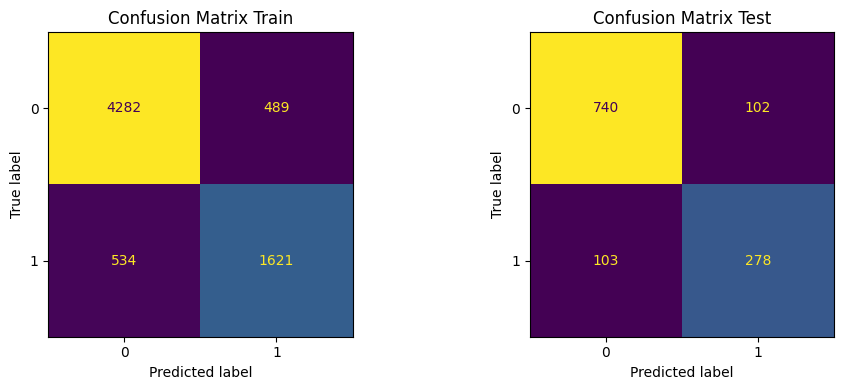

Test-data classification report
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       842
         1.0       0.73      0.73      0.73       381

    accuracy                           0.83      1223
   macro avg       0.80      0.80      0.80      1223
weighted avg       0.83      0.83      0.83      1223



In [70]:
print_results(grid)

# DecisionTreeClassifier

Decision Tree Classifier is a machine learning algorithm that predicts outcomes by recursively splitting the data into subsets based on feature values. At each node, it selects the feature and threshold that best separate the classes, typically using impurity measures such as Gini index or entropy. The process continues until a stopping criterion is met, resulting in a tree-like structure where leaves represent final class predictions.

In [71]:
DTC_ = DecisionTreeClassifier()
params={
"max_depth": [5,10,15,30,None],
"min_samples_split": [3,5,15],
"criterion":["gini",'entropy']
}


# GridSearchCV
grid_dtc = GridSearchCV(DTC_, params, cv=CV, n_jobs=-1)
grid_dtc.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 30, None],
                         'min_samples_split': [3, 5, 15]})

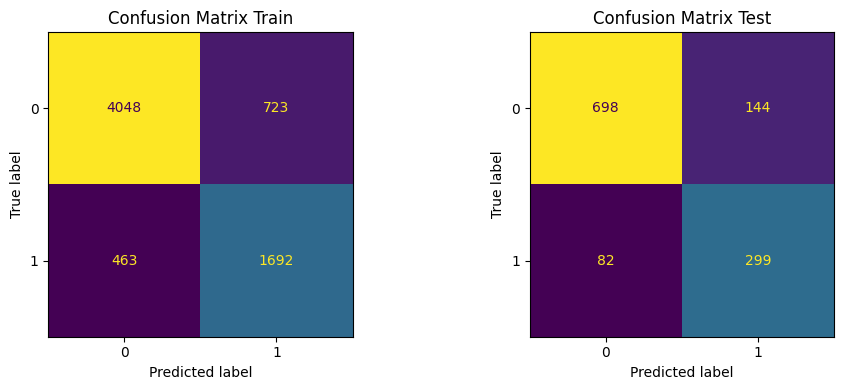

Test-data classification report
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       842
         1.0       0.67      0.78      0.73       381

    accuracy                           0.82      1223
   macro avg       0.78      0.81      0.79      1223
weighted avg       0.83      0.82      0.82      1223



In [72]:
print_results(grid_dtc)

# RandomForest

Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and robustness. Each tree is trained on a random subset of the data and features (bagging and feature sampling), which reduces overfitting compared to a single decision tree. The final prediction is typically made by majority voting (for classification) or averaging (for regression), resulting in a more stable and generalizable model.

In [73]:
rf = RandomForestClassifier()

params={
"max_depth": [5,10,15,30,None],
"n_estimators": [50,100],
"min_samples_split": [3,5,15],
}


# GridSearchCV
grid_rf = GridSearchCV(rf, params, cv=CV, n_jobs=-1)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 30, None],
                         'min_samples_split': [3, 5, 15],
                         'n_estimators': [50, 100]})

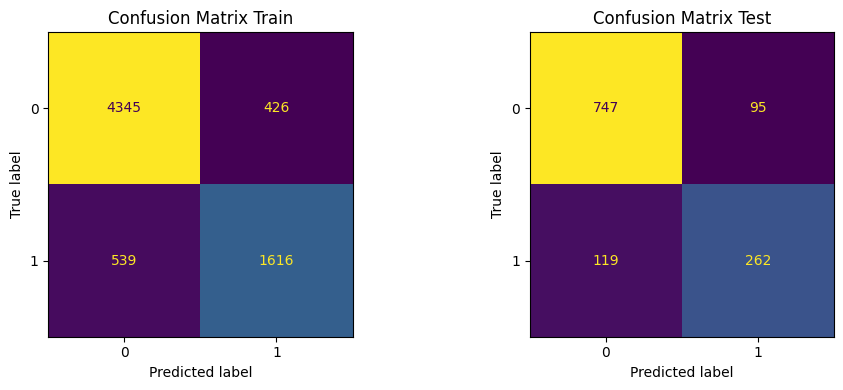

Test-data classification report
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       842
         1.0       0.73      0.69      0.71       381

    accuracy                           0.83      1223
   macro avg       0.80      0.79      0.79      1223
weighted avg       0.82      0.83      0.82      1223



In [74]:
print_results(grid_rf)

# GradientBoostingClassifier

Gradient Boosting Classifier is an ensemble method that builds a sequence of weak learners, usually decision trees, where each new tree corrects the errors made by the previous ones. The model is trained iteratively using gradient descent on a chosen loss function, so that each step reduces the residual errors of the ensemble. By combining many such weak learners, gradient boosting produces a strong predictive model that balances bias and variance.

In [75]:
gbc = GradientBoostingClassifier()


In [76]:
params={
    "max_depth": [5,10,15,30,None],
    "n_estimators": [50,100],
    "min_samples_split": [3,5,15],
    "max_features": ["sqrt", "log2", None]
}


# GridSearchCV
grid_gbc = GridSearchCV(gbc, params, cv=CV, n_jobs=-1)
grid_gbc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 30, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 15],
                         'n_estimators': [50, 100]})

In [77]:
#import pickle
#filename = "gbc.pickle"
#pickle.dump(grid_gbc, open(filename, "wb"))

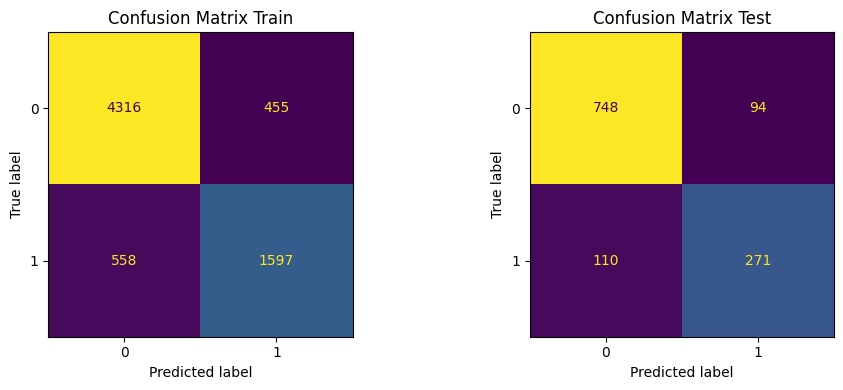

Test-data classification report
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       842
         1.0       0.74      0.71      0.73       381

    accuracy                           0.83      1223
   macro avg       0.81      0.80      0.80      1223
weighted avg       0.83      0.83      0.83      1223



In [78]:
print_results(grid_gbc)

# On results

Although ensemble methods such as Random Forest and Gradient Boosting Classifier are often expected to outperform a single decision tree, in this case the DecisionTreeClassifier achieved the highest recall. This means it was the most effective at identifying positive cases. SVM brought very good result - also better or comparable to ensemble methods. Logistic regression performed the worst - but still pretty decent. Results of our comparison could be broaden by SMOTE imputation - in our example there is ~70%/30% distribution in 0/1 OUTCOMES (pretty decent), but we may still find it useful. Another thing to take into consideration is the fact that driver's potential behaviour is not fully dictated by parameters taken into account. Accidents happen, and even perfect client on paper may "submit" some claims - therefore purely statistical methods (like log_regression) may be insufficient. Final decision is that DecisionTreeClassifier, outperformed the rest of models, with honorable mention's in SVM classifier.  